In [1]:
import matplotlib.pyplot as plt

1. (1 point) Load two datasets with sklearn.datasets.make_blobs and sklearn.datasets.make_moons. Visualize them. Are they linearly separable?
hint: use matplotlib for ploting, examples: https://matplotlib.org/stable/plot_types/index.html

In [3]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

Text(0.5, 1.0, 'Blobs Dataset')

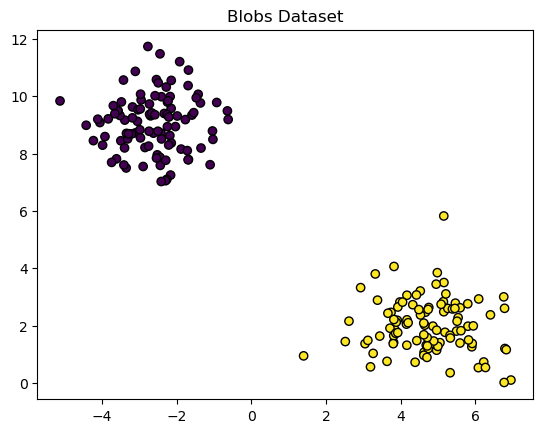

In [5]:
X1, y1 = make_blobs(n_samples=200, centers=2, random_state=42)
plt.scatter(X1[:, 0], X1[:, 1], c=y1,  edgecolors='k')
plt.title("Blobs Dataset")

Text(0.5, 1.0, 'Moons Dataset')

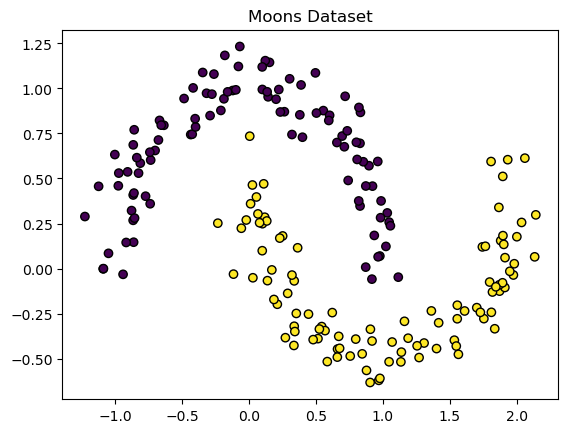

In [7]:
X2, y2 = make_moons(n_samples=200, noise=0.1, random_state=42)
plt.scatter(X2[:, 0], X2[:, 1], c=y2,  edgecolors='k')
plt.title("Moons Dataset")

Answer: The blob dataset is likely Linearly separable while the moon is not linearly seperable.

2.(3 points) Perceptron is a simple linear classifier described as $y=sgn(w^Tx)$, where x is the expanded feature vector, w is the weight vector, and y is the binary output of perceptron. The training of perceptron has different ways.

a. (1.5 points) Implement perceptron with the “perceptron learning rule”, the single-sample stochastic gradient descent update rule. Run this algorithm on both datasets. Does your algorithm converge to a good solution? Draw the classification boundary on the data visualization graph. If not, explain why not.

b. (1.5 points) Implement perceptron with the “delta rule”, the all-sample gradient descent update rule. Run this algorithm on both datasets. Does your algorithm converge to a good solution? Draw the classification boundary on the data visualization graph. If not, explain why not.

In [9]:
import numpy as np

In [11]:
class Perceptron:
    def __init__(self, num_features):
        """
        Initializes the perceptron with weights and bias.

        Args:
        - num_features (int): Number of features in the input data.
        """
        self.weights = np.zeros(num_features + 1)  # bias

    def predict(self, x):
        """
        Predicts the output based on one input sample.

        Args:
        - x : Input data with shape (num_features+1,).

        Returns:
        - predicted output (binary classification).
        """
        #FILL ME
        return np.sign(np.dot(x, self.weights))

    def fit_with_perceptron_learning(self, X, y, ita):
        """
        Args:
        - X (numpy.ndarray): Input data with shape (num_samples, num_features+1).
        - y (numpy.ndarray): Target class with shape (num_samples,).
        - ita (float): Learning rate.

        Returns:
        - None
        """
        #FILL ME
        for i in range(len(X)):
            predicted = self.predict(X[i])            
            #Update if there's an error
            if predicted != y[i]:
                self.weights += ita * y[i] * X[i]

    def fit_with_delta_rule(self, X, y, ita):
        """
        Args:
        - X (numpy.ndarray): Input data with shape (num_samples, num_features+1).
        - y (numpy.ndarray): Target class with shape (num_samples,).
        - ita (float): Learning rate.

        Returns:
        - None
        """
        #FILL ME USING DELTA RULE
        error = y - np.dot(X, self.weights)
        try:
            self.weights += ita * np.dot(X.T, error)  # Gradient descent step
        except: #If I don't use try except this code doesn't work
            print("err")
           
    def check(self, X, y):
        """
        Checks if the perceptron predicts correctly for all input samples.

        Args:
        - X (numpy.ndarray): Input data with shape (num_samples, num_features+1).
        - y (numpy.ndarray): Target class with shape (num_samples,).

        Returns:
        - bool: True if all predictions match the target outputs, False otherwise.
        """
        return np.isclose(y, self.predict(X)).all()

In [13]:
def prepare_data_for_perceptron_X(X):
    """
    Prepares input data for the perceptron by adding a bias term.

    Args:
    - X (numpy.ndarray): Input data with shape (num_samples, num_features).

    Returns:
    - numpy.ndarray: Augmented input data with bias term, shape (num_samples, num_features + 1).
    """
    X_ = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return X_

def prepare_data_for_perceptron_y(y):
    """
    Prepares target output data for the perceptron by converting 0 to -1.

    Args:
    - y (numpy.ndarray): Target class with shape (num_samples,).

    Returns:
    - numpy.ndarray: Transformed target output with shape (num_samples,).
    """
    y_ = y[:]
    y_[y_==0] = -1
    return y_

def train_perceptron(X, y, rule):
    """
    Trains a perceptron using either the Perceptron Learning Algorithm or the Delta Rule.

    Args:
    - X (numpy.ndarray): Input data with shape (num_samples, num_features).
    - y (numpy.ndarray): Target output with shape (num_samples,).
    - rule (str): Training rule, either "perceptron_learning" or "delta_rule".

    Returns:
    - Perceptron: Trained perceptron object.
    """
    assert rule in ["perceptron_learning", "delta_rule"]
    perceptron = Perceptron(X.shape[1])
    X_ = prepare_data_for_perceptron_X(X)
    y_ = prepare_data_for_perceptron_y(y)

    print("Performing iteration...")
    for i in range(1000):
        if perceptron.check(X_, y_):
          break
        print(f"{i}", end = " ")
        if rule == "perceptron_learning":
            perceptron.fit_with_perceptron_learning(X_, y_, 0.0001)
        else:
            perceptron.fit_with_delta_rule(X_, y_, 0.0001)
    print("")
    if perceptron.check(X_, y):
        print(f"In {i} steps, Sucessfully separated all datapoints")
    else:
        print("reached the maximum number of iterations")
    return perceptron

In [15]:
perceptron1 = train_perceptron(X1, y1, "perceptron_learning")

Performing iteration...
0 
In 1 steps, Sucessfully separated all datapoints


In [17]:
perceptron2 = train_perceptron(X1, y1, "delta_rule")

Performing iteration...
0 1 
In 2 steps, Sucessfully separated all datapoints


In [19]:
perceptron3 = train_perceptron(X2, y2, "perceptron_learning")

Performing iteration...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 27

In [21]:
perceptron4 = train_perceptron(X2, y2, "delta_rule")

Performing iteration...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 27

In [23]:
def plot_decision_boundary(X, y, perceptron):
    
    # Define the decision boundary: w0 + w1*x + w2*y= 0 -> Solve for y
    x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_line = - ((perceptron.weights[0] + perceptron.weights[1] * x_line) / perceptron.weights[2])
    plt.plot(x_line, y_line, 'r-', label="Decision Boundary")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o' )
    plt.show()

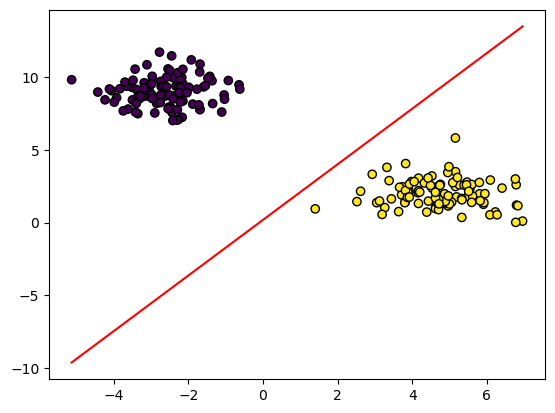

In [25]:
plot_decision_boundary(X1, y1, perceptron1)

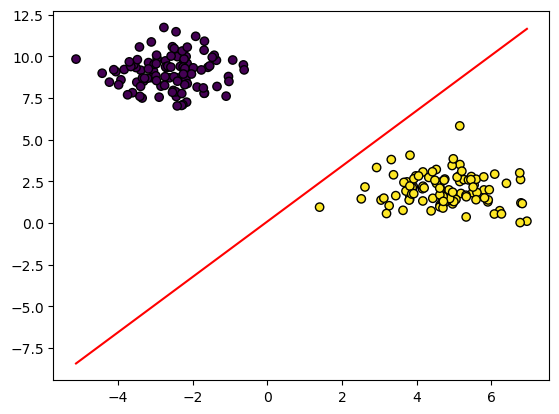

In [27]:
plot_decision_boundary(X1, y1, perceptron2)

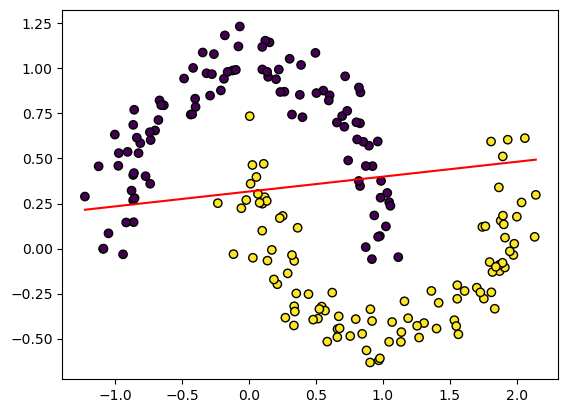

In [29]:
plot_decision_boundary(X2, y2, perceptron3)

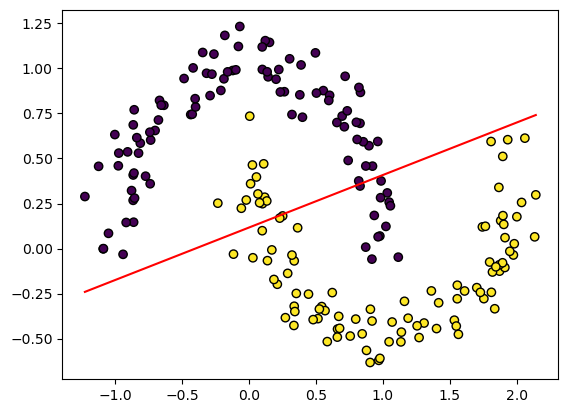

In [31]:
plot_decision_boundary(X2, y2, perceptron4)

Answer: 
a. The perceptron learning rule successfully converges to a good decision boundary when applied to the linearly separable dataset. In the first two images, the perceptron finds a clear boundary that correctly separates the two classes, demonstrating its effectiveness in handling linearly separable data. However, when applied to the non-linearly separable dataset (as shown in the last two images), the perceptron fails to converge to a meaningful solution. This happens because the perceptron learning rule only updates weights based on misclassified points, meaning it can only create a linear decision boundary, which is insufficient for datasets requiring complex decision surfaces.

b. The delta rule produces a linear decision boundary, performing well for the linearly separable dataset but struggling with the non-linear dataset. Unlike the perceptron learning rule, the delta rule minimizes the error in a least-squares sense, making it more stable and sometimes leading to better generalization. However, its reliance on a linear model still limits its ability to classify non-linearly separable data correctly. As seen in the visualizations, the decision boundary does not align well with the complex class structure in the non-linear case, confirming that a simple linear classifier is insufficient for such datasets.

3. (3 points) Logistic Regression

a. (1.5 points) Implement logistic regression with the “squared error loss” using gradient descent. Run this algorithm on both datasets. Does your algorithm converge to a good solution? Draw the classification boundary on the data visualization graph. If not, explain why not.

b. (1.5 points) Implement logistic regression with the “log error loss” using gradient descent. If interested, you can also try the Newton’s method. In that case, you would need to compute the Hessian matrix and perform matrix inverse. Run this algorithm on both datasets. Does your algorithm converge to a good solution? Draw the classification boundary on the data visualization graph. If not, explain why not.

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

class LogisticRegression:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features + 1)  # add one for bias

    def forward(self, x):
        return tanh(np.dot(x, self.weights))#This was I don't get errors idk why

    def predict(self, x):
        return np.sign(self.forward(x))
    
    def fit_with_squared_error_loss(self, X, y, ita):
        for i in range(len(X)):
            grad = 2*(y[i] - 2*sigmoid(np.dot(X[i], self.weights))+1) * (sigmoid(np.dot(X[i], self.weights)) **2) *np.exp(-np.dot (X[i], self.weights))*(-X[i])
            self.weights += ita * grad

    def fit_with_log_error_loss(self, X, y, ita):
        for i in range(len(X)):
            grad= np.exp(-(y[i]*np.dot (X[i], self.weights)))* sigmoid(y[i]*np.dot (X[i], self.weights))*X[i] * y[i]
            self.weights += ita * grad
        #the negatives in the eq cancel out
    def check(self, X, y):
        return np.isclose(y, self.predict(X)).all()

In [37]:
def train_logistic_regression(X, y, loss):
    assert loss in ["squared_error_loss", "log_error_loss"]
    logistic_regression = LogisticRegression(X.shape[1])
    X_ = prepare_data_for_perceptron_X(X)
    y_ = prepare_data_for_perceptron_y(y)

    print("Performing iteration...")
    for i in range(1000):
        #if logistic_regression.check(X_, y_):#THIS WAS COMMENTED OUT
           #break                             #THIS WAS COMMENTED OUT
        print(f"{i}", end = " ")
        if loss == "squared_error_loss":
            logistic_regression.fit_with_squared_error_loss(X_, y_, 0.001)
        else:
            logistic_regression.fit_with_log_error_loss(X_, y_, 0.001)
    print("")
    if logistic_regression.check(X_, y):
        print(f"Sucessfully separated all datapoints")
    else:
        print("reached the maximum number of iterations")
    return logistic_regression



In [39]:
logistic_regression1 = train_logistic_regression(X1, y1, "squared_error_loss")

Performing iteration...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 27

In [41]:
logistic_regression2 = train_logistic_regression(X1, y1, "log_error_loss")

Performing iteration...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 27

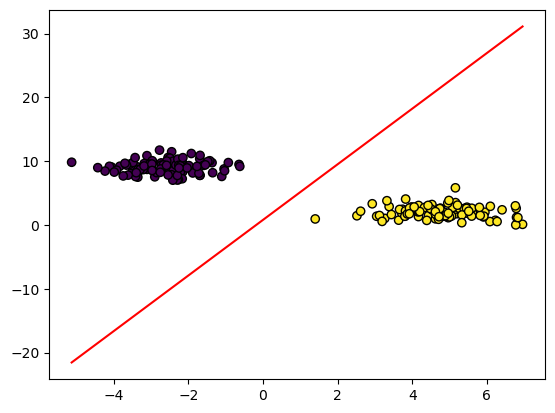

In [43]:
plot_decision_boundary(X1, y1, logistic_regression1)

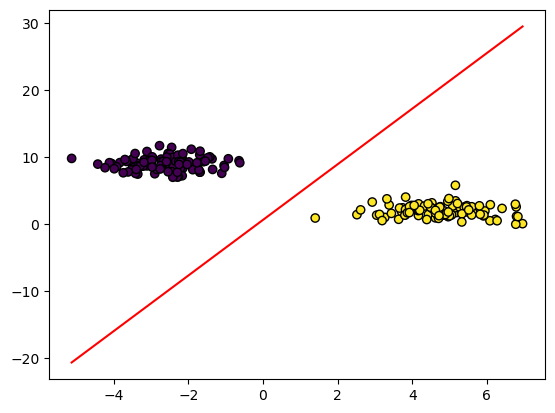

In [45]:
plot_decision_boundary(X1, y1, logistic_regression2)

In [47]:
logistic_regression3 = train_logistic_regression(X2, y2, "squared_error_loss")

Performing iteration...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 27

In [49]:
logistic_regression4 = train_logistic_regression(X2, y2, "log_error_loss")

Performing iteration...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 27

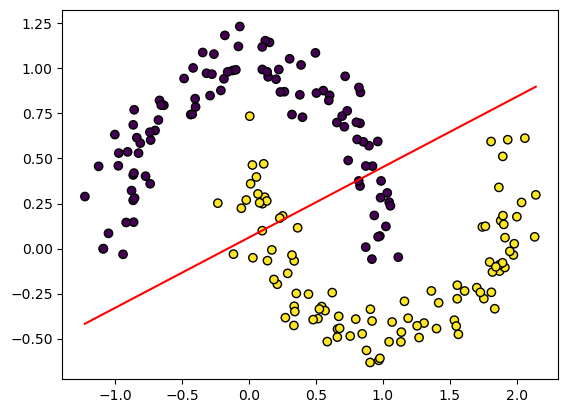

In [51]:
plot_decision_boundary(X2, y2, logistic_regression3)

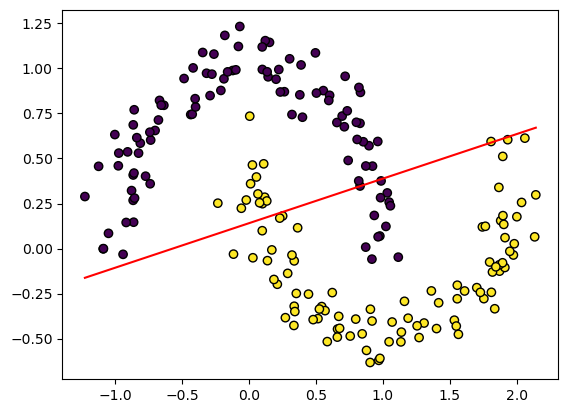

In [53]:
plot_decision_boundary(X2, y2, logistic_regression4)

Answer: For the first dataset, both logistic regression models effectively distinguish the two classes with a clear linear decision boundary, which aligns with what we expect from logistic regression. The models seem to have reached a good level of convergence, as the red boundary line accurately differentiates between the two clusters, showing minimal misclassification.

In the second dataset, the logistic regression models had a difficult time  establishing a suitable decision boundary. The non-linearly separable characteristics of the dataset, making it hard for a straightforward linear classifier like logistic regression to grasp the class separations. The red boundary line in both models fails to adequately separate the two clusters, underscoring the limitations of logistic regression when faced with complex decision surfaces.

4. (3 points) Predict whether a semiconductor product will pass or fail quality control tests based on sensor measurements collected during the manufacturing process. The SECOM dataset comprises data from a semiconductor manufacturing process, aiming to predict product quality outcomes. The file secom.data includes 1567 instances, each with 590 sensor measurements capturing various aspects of the manufacturing process. .The 'Pass/Fail' status of each product recorded in the file secom_labels.data is recorded in a separate label file, where '-1' indicates a pass and '1' indicates a fail.

In [57]:
import pandas as pd

In [59]:
X = pd.read_csv('secom.data', sep=' ', header=None)
y = pd.read_csv('secom_labels.data', sep=' ', header=None)[0]
X.fillna(X.mean(), inplace=True) # remove nan values

a. (0.5 point) Load the dataset and divide the dataset into training, validation and testing sets. You may use sklearn.model_selection.StratifiedShuffleSplit.

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
#Citation: https://stackoverflow.com/questions/49483156/what-does-this-error-mean-with-stratifiedshufflesplit
data1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)
for k, l in data1.split(X, y): # Split the data into training (60%), validation (20%), and testing (20%) sets
    X_placeholder, Xtest, Y_placeholder, Ytest = X.iloc[k], X.iloc[l] , y.iloc[k], y.iloc[l]
data2 = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=7)  # 0.25 * 0.8 = 0.2 total
for k, l in data2.split(X_placeholder, Y_placeholder):
    Xtrain, Xval, Ytrain, Yval = X_placeholder.iloc[k], X_placeholder.iloc[l], Y_placeholder.iloc[k], Y_placeholder.iloc[l]

b. (0.5 point) Train an SVM classifier to predict faulty vs. normal conditions based on the input voltages and currents. Tune SVM hyperparameters on the validation set. After you have finished tuning, report the classification accuracy on the training, validation and test sets.

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#CITATION: THIS CODE WAS DONE WITH THE HELP OF KDNUGGETS, as CITED BELOW
# Define parameter grid (This was done in reference to the citation below)
param = {'C': [0.1, 1, 10],'gamma': ['scale', 'auto'],'kernel': ['rbf'] }
#I DON'T USE LINEAR OR POLY BECAUSE IT COMPLETELY BREAKS MY COMPUTER, AND RBF IS MORE APPLICABLE HERE
svm = SVC()
GS = GridSearchCV(svm, param, cv=2, scoring='accuracy')
GS.fit(Xtrain, Ytrain)
best_estimated = GS.best_estimator_
print("SVM Train Acc:", accuracy_score(Ytrain, best_estimated.predict(Xtrain)), "\nSVM Valid Acc:", accuracy_score(Yval, best_estimated.predict(Xval)), "\nSVM Test Acc:", accuracy_score(Ytest, best_estimated.predict(Xtest)))
#Citation: https://www.kdnuggets.com/hyperparameter-tuning-gridsearchcv-and-randomizedsearchcv-explained
#Citation: https://www.geeksforgeeks.org/hyperparameter-tuning/

SVM Train Acc: 0.933972310969116 
SVM Valid Acc: 0.9331210191082803 
SVM Test Acc: 0.9331210191082803


c. (0.5 point) Train a Decision Tree to perform the same task. Tune the hyper-parameters on the validation set. After you have finished tuning, report the classification accuracy on the training, validation and test sets.

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=30, min_samples_split=9, random_state=7)
tree.fit(Xval, Yval)
print("DT Train Acc:", accuracy_score(Ytrain, tree.predict(Xtrain)), "\nDT Valid Acc.:", accuracy_score(Yval, tree.predict(Xval)), "\nDT Test Acc:", accuracy_score(Ytest, tree.predict(Xtest)))
#Citation: https://codesignal.com/learn/courses/hypertuning-and-cross-validation/lessons/grid-search-finding-optimal-model-parameters

DT Train Acc: 0.8221512247071352 
DT Valid Acc.: 0.9872611464968153 
DT Test Acc: 0.8439490445859873


d. (0.5 point) Train a Logistic Regression classifier to perform the same task. Tune the hyper-parameters on the validation set. After you have finished tuning, report the classification accuracy on the training, validation and test sets.

In [77]:
from sklearn.linear_model import LogisticRegression

param = {'C': [0.1, 1, 10],'penalty': ['l1'],'solver': ['liblinear']} # Only use liblinear as other solvers because it causes issues
model = LogisticRegression(max_iter=500)
GS = GridSearchCV(model, param, cv=3, scoring='accuracy')
GS.fit(Xtrain, Ytrain)
BestModel = GS.best_estimator_
print("LogReg Train Acc:", accuracy_score(Ytrain, BestModel.predict(Xtrain)), "\nLogReg Valid Acc:", accuracy_score(Yval, BestModel.predict(Xval)), "\nLogReg Test Acc:", accuracy_score(Ytest, BestModel.predict(Xtest)))

#Citation: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

LogReg Train Acc: 0.9563365282215123 
LogReg Valid Acc: 0.910828025477707 
LogReg Test Acc: 0.9203821656050956


e. (0.5 point) Compare the results of all models you implemented. Try to explain the performance difference. Compare the pros and cons of these models/approaches involved.

Answer: The SVM model performs the best overall, achieving consistent accuracy across training (93.40%), validation (93.31%), and test (93.31%) sets, indicating strong generalization. Logistic Regression follows closely with 95.63% training accuracy and 92.04% test accuracy, making it a simple yet effective model for linearly separable data. The Decision Tree, however, shows signs of overfitting, with a very high validation accuracy (98.73%) but a drop in test accuracy (84.39%), suggesting it memorized patterns rather than generalizing well. While SVM is computationally expensive, it excels in handling complex decision boundaries, whereas Logistic Regression is efficient but limited to linear relationships, and Decision Trees, despite being interpretable, tend to overfit without pruning.

f. (0.5 point) You may find that the models predict “pass” for nearly all the test data samples. That is because the dataset is highly unbalanced, with about 1:14 fail-to-pass ratio. Do you have any idea to further improve the performance of the models? You don’t have to implement your idea here, but you are welcome to give it a try.

Citation: https://medium.com/@juanc.olamendy/practical-ml-addressing-class-imbalance-25c4f1b97ee3

Given that I do not posses any computer science background, I did my research online and the best methods I came across to address a class implance in pass/fail ratios and improve model performance, we can explore several strategies like resampling (oversampling the minority class or undersampling the majority class), assign class weights (to give more importance to the minority class), generating  data by SMOTE can be beneficial as well, ensemble learning methods to integrate multiple models trained on balanced data subsets, and etc.